[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tdene/synth_opt_adders/blob/master/docs/notebooks/factorization.ipynb)

# Adder-specific optimizations [Factorization]

**NOTE**: This is a work in progress and will not be functional until version **1.1.0** of the library

## Setup (RUN ME before executing any code in this section)

In [ ]:
!pip install --upgrade git+https://github.com/tdene/synth_opt_adders.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tdene/synth_opt_adders.git to /tmp/pip-req-build-4pvpenzv
  Running command git clone -q https://github.com/tdene/synth_opt_adders.git /tmp/pip-req-build-4pvpenzv
  Created wheel for pptrees: filename=pptrees-1.0.5-py3-none-any.whl size=62245 sha256=c042ce21a9183dcaa1826ec41c68cff6d0bba214e2d59ed9d85a27ed0dec851e
  Stored in directory: /tmp/pip-ephem-wheel-cache-c2yzrpv7/wheels/46/ba/74/bbe32b722a1f52c3c3aa52fcbdb050975cb54826ed0e4f77cd
Successfully built pptrees


## Integrating the pre-processing logic into the tree

The circuits shown so far consist of three parts:

*   "pre-processing" logic, which encodes the inputs into an alternate form
*   The main body of the tree, which computes the non-local aspect of the operation
*   "post-processing" logic, which combines the non-local and local aspects of the operation

The previous section shows a novel way of integrating the post-processing logic into the main body of the tree.

Is there a way to integrate the pre-processing logic into the main body of the tree?

In a way, yes, there is.

## Ling factorization

An earlier section showed the following CMOS schematic of the ■ recurrence operator for addition:

![](https://drive.google.com/uc?export=view&id=1O0v4RCn8GlN10Adtne98e0Ir0CU-Goqg)

The section on the right is a two-input gate.<br>
The section on the left is a three-input gate.<br>

One of the inputs to that three-input gate can be factored off onto a parallel path.<br>
Below are results of a spice simulation showing the effect this has on delay.

![](https://drive.google.com/uc?export=view&id=1eTOBLmIOjD29-lLU9F1AemXIKTRNoeFq)

Note however that moving logic onto a parallel path leads to increased area and power consumption, and vastly increased complexity which can ultimately eliminate the benefits of the delay reduction.

## What is the Ling factorization expressed in terms of trees?

This factorization can be seen as a stereoscopic composition of trees.

Just like with 3D glasses, there is a red lens and a blue lens, and the images they create combine into the overall picture.

Here is the blue lens:

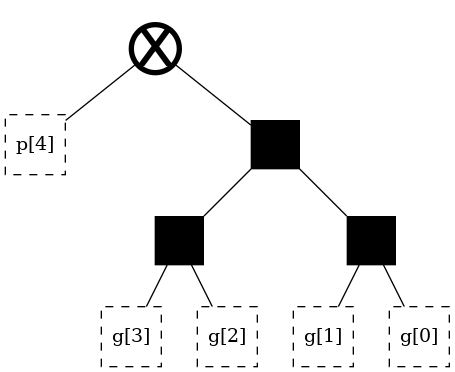

In [1]:
from pptrees.AdderTree import AdderTree as tree

t = tree(5, start_point = 2, leaf_labels = ["c","g","p"])
t

Here is one possible red lens:

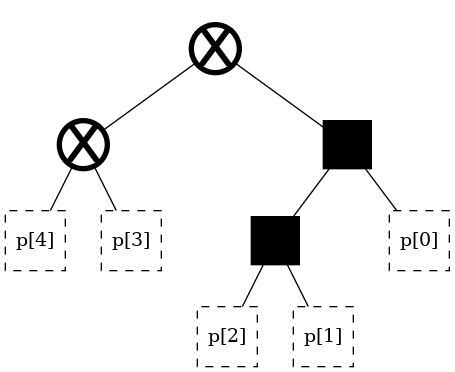

In [2]:
from pptrees.AdderTree import AdderTree as tree

t = tree(5, start_point = 6, leaf_labels = ["c","p","p"])
t

These two trees can be overlaid on top of each other, like transparencies on a projector screen.

Their stereoscopic composition then gives rise to a new structure.

## Arbitrary combination of Ling and sparseness

The framework described thus far allows for arbitrary combinations of Ling and sparseness, whereas prior work only applies them in simple, regular, fashion.

Such logic would be incredibly difficult to design by hand.<br>
Luckily, a tool exists that can automatically do it.

## Adder-specific?

Note that this optimization is not adder-specific, but instead can be applied to any operation where a similar factorization can be performed.

A simple example is a leading-zero detection circuit.